# Boostrapping para estimar el error en los parámetros regresión

**Utilizaremos la librería boot para aplicar el método de boostrap y obtener una estimación más certera de los errores de los parámetros de regresión. De nuevo, lo haremos sobre el mismo Boston dataset.** 

**Lo haremos para el caso más simple de una única variable independiente (lstat). Recordemos qué se obtenía:**

In [1]:
Boston <- read.csv(file="Boston_data.csv", sep=",", head=TRUE)
attach(Boston)
lm.fit = lm(medv~lstat, data=Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


**Los parámetros son** Intercept $= 34.6\pm0.6$ **y** lstat $= -0.95\pm0.04$.


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Boston, statistic = bs, R = 1000, formula = medv ~ 
    lstat)


Bootstrap Statistics :
      original       bias    std. error
t1* 34.5538409  0.006495461  0.80629527
t2* -0.9500494 -0.001441300  0.05396708

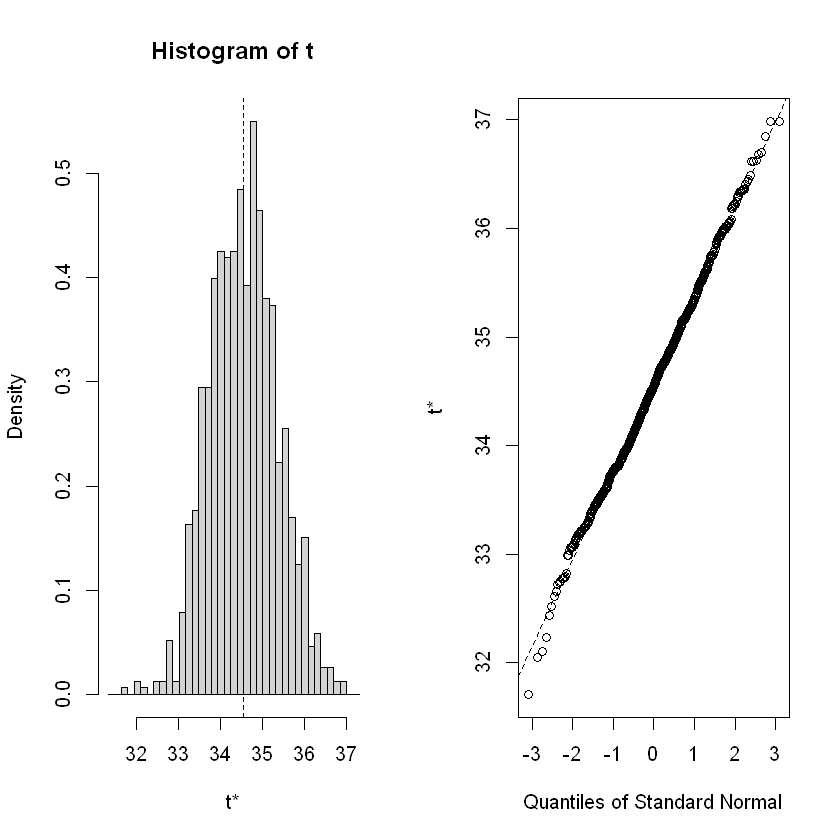

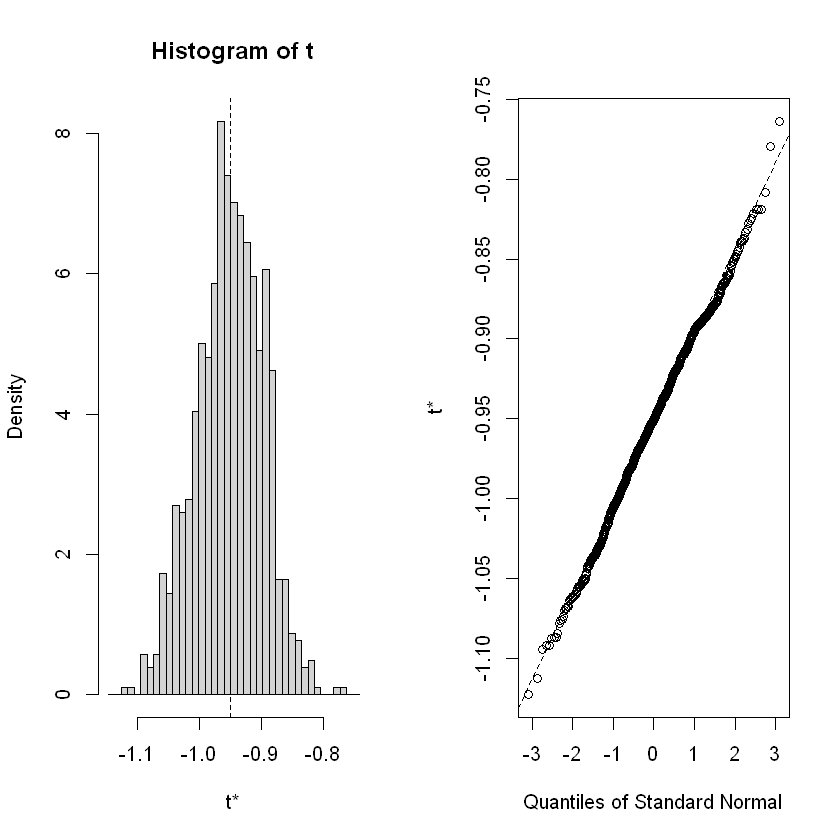

In [2]:
#install.packages('boot', repo='https://cran.rediris.es/')
library(boot)

bs <- function(formula, data, indices) {
  d <- data[indices,] # allows boot to select sample
  fit <- lm(formula, data=d)
  return(coef(fit))
}
# bootstrapping with 1000 replications
results <- boot(data=Boston, statistic=bs,
   R=1000, formula=medv~lstat)

results
plot(results, index=1) # intercept
plot(results, index=2) # lstat

**De aquí obtenemos que el error es 0.8 para el Intercept y 0.05 para el parámetro asociado con lstat.**